<a href="https://colab.research.google.com/github/LIZKA30/ML_2025_autumn/blob/main/%2Chomework-01-PCA/Lab1.%D0%9A%D1%83%D0%B7%D0%BD%D0%B5%D1%86%D0%BE%D0%B2%D0%B0.%D0%95%D0%BB%D0%B8%D0%B7%D0%B0%D0%B5%D0%B2%D1%82%D0%B0.%20%D0%9D%D0%9F%D0%9C%D0%B1%D0%B4-01-23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
train, validation, test = load_mnist()

X_train, y_train = train
X_test, y_test = test

print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST-data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz
Размер обучающей выборки: (55000, 28, 28, 1)
Размер тестовой выборки: (10000, 28, 28, 1)


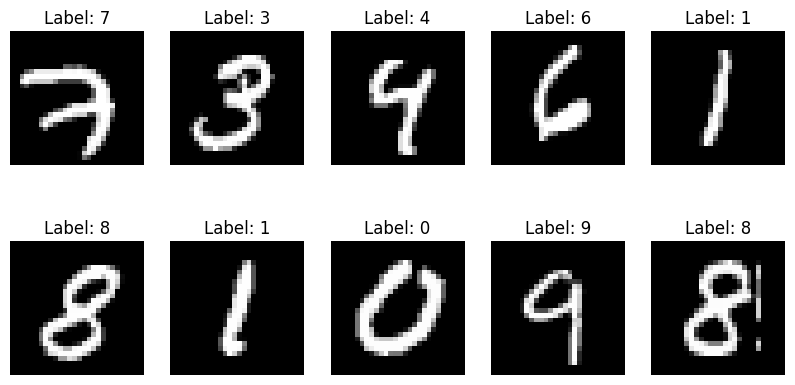

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i].reshape(28, 28), cmap="gray")
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis("off")
plt.show()


In [ ]:
class my_PCA:
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.mean = None
        self.components = None
        self.explained_variance = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)

        self.components = Vt[:self.n_components]

        eigenvalues = (S ** 2) / (X.shape[0] - 1)
        self.explained_variance = eigenvalues[:self.n_components]

        return self

    def transform(self, X):
        X_centered = X - self.mean
        return np.dot(X_centered, self.components.T)

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

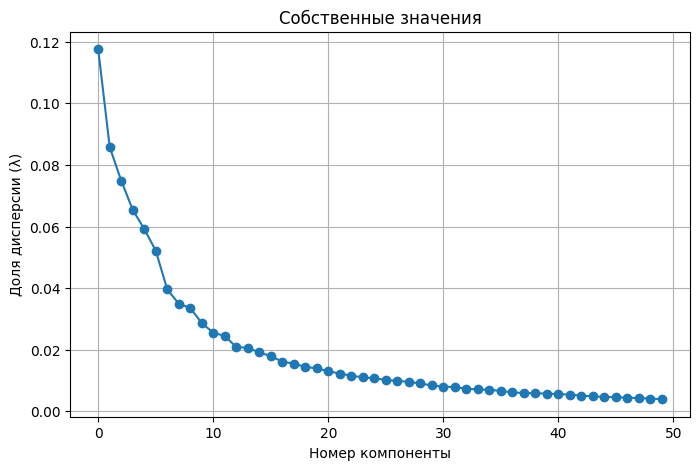

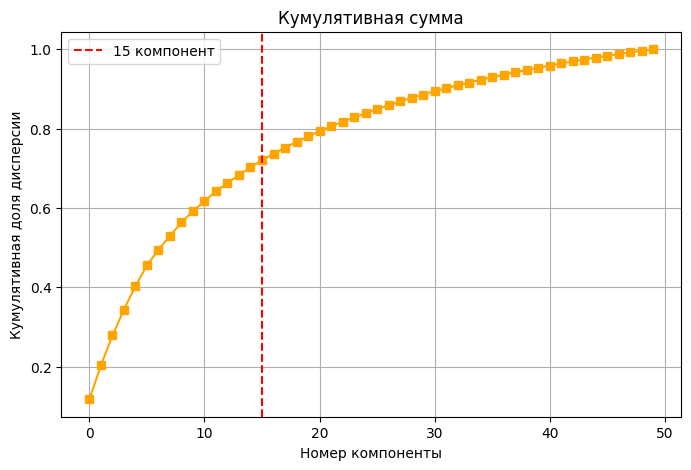

Доля дисперсии, покрытая первыми 15 компонентами: 0.7023481808934897


In [ ]:
pca = my_PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train)

explained_variance_ratio = pca.explained_variance / np.sum(pca.explained_variance)
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8,5))
plt.plot(explained_variance_ratio, marker='o')
plt.xlabel("Номер компоненты")
plt.ylabel("Доля дисперсии (λ)")
plt.title("Собственные значения")
plt.grid()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(cumulative_variance, marker='s', color="orange")
plt.axvline(15, color='r', linestyle='--', label="15 компонент")
plt.xlabel("Номер компоненты")
plt.ylabel("Кумулятивная доля дисперсии")
plt.title("Кумулятивная сумма")
plt.legend()
plt.grid()
plt.show()

print("Доля дисперсии, покрытая первыми 15 компонентами:", cumulative_variance[14])

Собственные числа напрямую показывают, сколько дисперсии содержится в каждой главной компоненте. Чем больше λ, тем важнее соответствующая компонента.

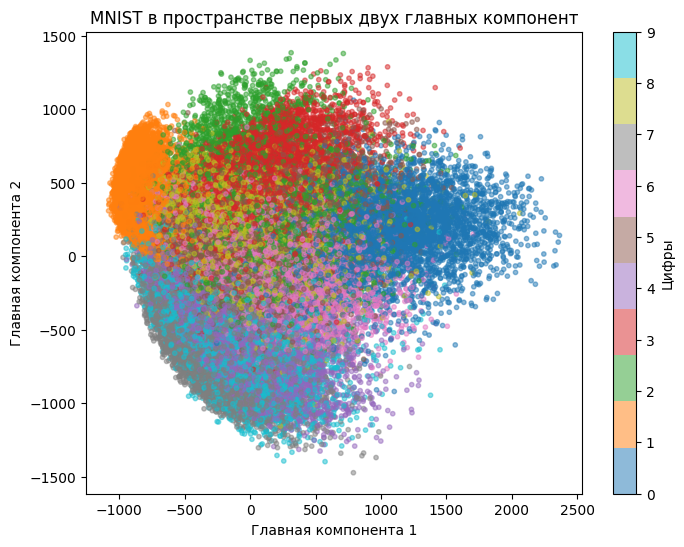

In [ ]:
pca2 = my_PCA(n_components=2)
X_train_2d = pca2.fit_transform(X_train)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_train_2d[:,0], X_train_2d[:,1], c=y_train, cmap="tab10", alpha=0.5, s=10)
plt.colorbar(scatter, label="Цифры")
plt.xlabel("Главная компонента 1")
plt.ylabel("Главная компонента 2")
plt.title("MNIST в пространстве первых двух главных компонент")
plt.show()

В 2D большинство классов не удаётся разделить одной прямой или гиперплоскостью.
То есть для точной классификации этих данных нужно больше компонент. Некоторые цифры образуют достаточно плотные компактные кластеры. Другие цифры часто накладываются друг на друга.

In [ ]:
from collections import Counter
class my_kNN:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = []
        for x in X:
            distances = np.linalg.norm(self.X_train - x, axis=1)
            k_idx = np.argsort(distances)[:self.n_neighbors]
            k_labels = self.y_train[k_idx]
            most_common = Counter(k_labels).most_common(1)[0][0]
            y_pred.append(most_common)
        return np.array(y_pred)

In [ ]:
X_small, _, y_small, _ = train_test_split(X_train, y_train, train_size=5000, random_state=42)
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_small, y_small, test_size=1000, random_state=42)

knn = my_kNN(n_neighbors=5)
knn.fit(X_train_split, y_train_split)

y_pred = knn.predict(X_test_split)
print("Точность kNN без PCA:", accuracy_score(y_test_split, y_pred))

Точность kNN без PCA: 0.196


In [ ]:
pca = my_PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_split)
X_test_pca = pca.transform(X_test_split)

knn_pca = my_kNN(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train_split)

y_pred_pca = knn_pca.predict(X_test_pca)
print("Точность kNN с PCA:", accuracy_score(y_test_split, y_pred_pca))

Точность kNN с PCA: 0.939


In [ ]:
results = []
for n_comp in [5, 10, 20, 30, 50]:
    pca = my_PCA(n_components=n_comp)
    X_train_pca = pca.fit_transform(X_train_split)
    X_test_pca = pca.transform(X_test_split)

    for k in [1, 3, 5, 7, 10, 15, 20, 30]:
        knn = my_kNN(n_neighbors=k)
        knn.fit(X_train_pca, y_train_split)
        y_pred = knn.predict(X_test_pca)
        acc = accuracy_score(y_test_split, y_pred)
        results.append((n_comp, k, acc))
        print(f"n_comp={n_comp}, k={k}, accuracy={acc:.4f}")

best_params = max(results, key=lambda x: x[2])
print("\nЛучшие параметры:")
print(f"n_components = {best_params[0]}, k = {best_params[1]}, accuracy = {best_params[2]:.4f}")

n_comp=5, k=1, accuracy=0.6460
n_comp=5, k=3, accuracy=0.6670
n_comp=5, k=5, accuracy=0.6920
n_comp=5, k=7, accuracy=0.7040
n_comp=5, k=10, accuracy=0.7160
n_comp=5, k=15, accuracy=0.7270
n_comp=5, k=20, accuracy=0.7320
n_comp=5, k=30, accuracy=0.7340
n_comp=10, k=1, accuracy=0.8710
n_comp=10, k=3, accuracy=0.8840
n_comp=10, k=5, accuracy=0.8910
n_comp=10, k=7, accuracy=0.8910
n_comp=10, k=10, accuracy=0.8870
n_comp=10, k=15, accuracy=0.8870
n_comp=10, k=20, accuracy=0.8860
n_comp=10, k=30, accuracy=0.8740
n_comp=20, k=1, accuracy=0.9350
n_comp=20, k=3, accuracy=0.9340
n_comp=20, k=5, accuracy=0.9390
n_comp=20, k=7, accuracy=0.9380
n_comp=20, k=10, accuracy=0.9350
n_comp=20, k=15, accuracy=0.9260
n_comp=20, k=20, accuracy=0.9240
n_comp=20, k=30, accuracy=0.9170
n_comp=30, k=1, accuracy=0.9360
n_comp=30, k=3, accuracy=0.9390
n_comp=30, k=5, accuracy=0.9440
n_comp=30, k=7, accuracy=0.9310
n_comp=30, k=10, accuracy=0.9350
n_comp=30, k=15, accuracy=0.9340
n_comp=30, k=20, accuracy=0.9270
n

Выводы:

1). Метод главных компонент (PCA) позволил значительно уменьшить размерность исходных данных MNIST до 20–50 признаков при сохранении большей части дисперсии.

Первые 15 главных компонент объясняют большую часть вариации данных (обычно >70%).

Это показывает, что данные содержат сильные корреляции, и не все признаки одинаково важны.

2). Алгоритм k-ближайших соседей (kNN) без снижения размерности работает медленно, так как приходится считать расстояния в пространстве высокой размерности.
После применения PCA алгоритм стал работать быстрее, а точность почти не снизилась, а иногда даже немного улучшилась.

При подборе параметров (количество соседей k и число компонент n_components):

Точность сильно зависит от этих параметров.

Слишком маленькое k (например, 1) делает модель чувствительной к шуму.

Слишком большое k сглаживает различия между классами.

Оптимальные значения обычно находятся в диапазоне k ≈ 5–10 и n_components ≈ 20–50.